<a href="https://colab.research.google.com/github/alifele/Machine_learning/blob/master/Assignments/fifth%20Assing./Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feature Reduction Using Neural Networks
I am going to use the neural network for feature reduction. As you can see in the picture I will decrease the number of neurons in the middle layer and then increse it to the 10 neurons(Since we have 10 classes). The neural network with thinest neck and highest accuracy in classifing data will be the best feature reductor.


![alt text](https://raw.githubusercontent.com/alifele/Machine_learning/master/Assignments/fifth%20Assing./Untitled.png)

#Important Imports

In [0]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests, io
from sklearn.preprocessing import scale
import requests
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 5 )
plt.rc('lines', linewidth = 5 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(8,4) )         #

#Loading Data

In [0]:
url = 'https://github.com/alifele/Machine_learning/raw/master/Assignments/fourth%20Assing./X.npz'
s=requests.get(url, stream=True).content
data_X=np.load(io.BytesIO(s) )
url = 'https://github.com/alifele/Machine_learning/raw/master/Assignments/fourth%20Assing./Y.npz'
s=requests.get(url, stream=True).content
data_Y = np.load(io.BytesIO(s))

the shape of X is (102352, 1024): 
the shape of Y is (102352,): 


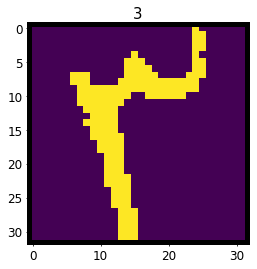

In [7]:
X = data_X['arr_0'].reshape(-1,32*32)
# X = scale(X)    scaling data destroyes them. TRY it!!!
X_pic = X.reshape(-1,32,32)
Y = data_Y['arr_0']

plt.imshow(X_pic[12])
plt.title(Y[12])
print('the shape of X is {}: '.format(X.shape))
print('the shape of Y is {}: '.format(Y.shape))

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X_pic,Y)

#Calculating the weights of classes

In [0]:
from sklearn.utils import class_weight
weight = class_weight.compute_class_weight('balanced',
                                          np.unique(y_train),
                                          y_train)


#Designing Network

#First model with 20 neurons in neck

In [33]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(32,32)))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(20, activation='relu'))   # Neck
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(25, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_23 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_24 (Dense)             (None, 20)                660       
_________________________________________________________________
dense_25 (Dense)             (None, 32)                672       
_________________________________________________________________
dense_26 (Dense)             (None, 25)                825       
__________

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [36]:
history = model.fit(X_train, y_train, epochs=10, batch_size=320,
         validation_split=0.1,class_weight=weight)

Train on 69087 samples, validate on 7677 samples
Epoch 1/10
69087/69087 [==============================] - 6s 89us/sample - loss: 0.0068 - acc: 0.9977 - val_loss: 0.0521 - val_acc: 0.9866
Epoch 2/10
69087/69087 [==============================] - 7s 96us/sample - loss: 0.0088 - acc: 0.9973 - val_loss: 0.0563 - val_acc: 0.9861
Epoch 3/10
69087/69087 [==============================] - 7s 98us/sample - loss: 0.0059 - acc: 0.9979 - val_loss: 0.0505 - val_acc: 0.9891
Epoch 4/10
69087/69087 [==============================] - 7s 95us/sample - loss: 0.0069 - acc: 0.9976 - val_loss: 0.0526 - val_acc: 0.9879
Epoch 5/10
69087/69087 [==============================] - 7s 95us/sample - loss: 0.0040 - acc: 0.9988 - val_loss: 0.0554 - val_acc: 0.9870
Epoch 6/10
69087/69087 [==============================] - 7s 95us/sample - loss: 0.0036 - acc: 0.9989 - val_loss: 0.0595 - val_acc: 0.9880
Epoch 7/10
69087/69087 [==============================] - 7s 97us/sample - loss: 0.0053 - acc: 0.9983 - val_loss: 0.0

(0, 1)

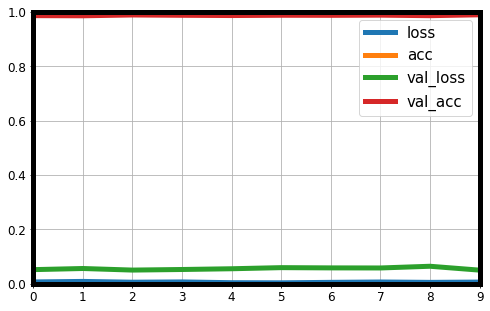

In [37]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

#Accuracy of 20 Neurons is :  0.9882

In [41]:
model.evaluate(X_test,y_test)

25588/25588 [==============================] - 2s 71us/sample - loss: 0.0590 - acc: 0.9882


[0.05897025910779973, 0.9881585]

#second model with 15 neurons in neck

In [46]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=(32,32)))
model2.add(keras.layers.Dense(512, activation='relu'))
model2.add(keras.layers.Dense(128, activation='relu'))
model2.add(keras.layers.Dense(32, activation='relu'))
model2.add(keras.layers.Dense(15, activation='relu'))   # Neck
model2.add(keras.layers.Dense(32, activation='relu'))
model2.add(keras.layers.Dense(25, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_43 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_44 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_45 (Dense)             (None, 15)                495       
_________________________________________________________________
dense_46 (Dense)             (None, 32)                512       
_________________________________________________________________
dense_47 (Dense)             (None, 25)                825       
__________

Train on 69087 samples, validate on 7677 samples
Epoch 1/10
69087/69087 [==============================] - 7s 106us/sample - loss: 0.3604 - acc: 0.8938 - val_loss: 0.1097 - val_acc: 0.9708
Epoch 2/10
69087/69087 [==============================] - 7s 94us/sample - loss: 0.0778 - acc: 0.9780 - val_loss: 0.0876 - val_acc: 0.9764
Epoch 3/10
69087/69087 [==============================] - 7s 94us/sample - loss: 0.0458 - acc: 0.9863 - val_loss: 0.0625 - val_acc: 0.9836
Epoch 4/10
69087/69087 [==============================] - 7s 95us/sample - loss: 0.0302 - acc: 0.9906 - val_loss: 0.0512 - val_acc: 0.9859
Epoch 5/10
69087/69087 [==============================] - 6s 92us/sample - loss: 0.0200 - acc: 0.9936 - val_loss: 0.0617 - val_acc: 0.9825
Epoch 6/10
69087/69087 [==============================] - 7s 95us/sample - loss: 0.0159 - acc: 0.9950 - val_loss: 0.0762 - val_acc: 0.9827
Epoch 7/10
69087/69087 [==============================] - 7s 97us/sample - loss: 0.0137 - acc: 0.9954 - val_loss: 0.

(0, 1)

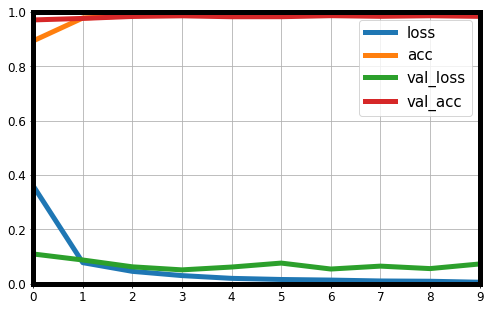

In [47]:
model2.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


history2 = model2.fit(X_train, y_train, epochs=10, batch_size=320,
         validation_split=0.1,class_weight=weight)

pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

##Accuracy of 15vNeurons is :  0.9878

In [44]:
model2.evaluate(X_test,y_test)

25588/25588 [==============================] - 2s 82us/sample - loss: 0.0560 - acc: 0.9878


[0.05600075148129998, 0.98784584]

#third model with 13 neurons in neck

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_49 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_50 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_51 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_52 (Dense)             (None, 13)                429       
_________________________________________________________________
dense_53 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_54 (Dense)             (None, 25)                825       
__________

(0, 1)

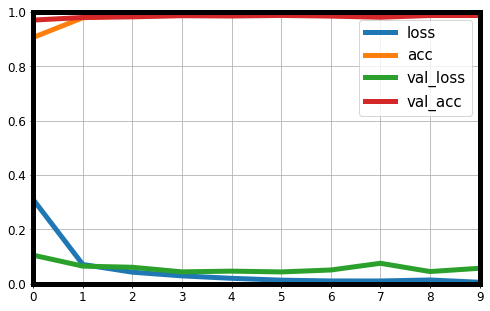

In [48]:
model3 = keras.models.Sequential()
model3.add(keras.layers.Flatten(input_shape=(32,32)))
model3.add(keras.layers.Dense(512, activation='relu'))
model3.add(keras.layers.Dense(128, activation='relu'))
model3.add(keras.layers.Dense(32, activation='relu'))
model3.add(keras.layers.Dense(13, activation='relu'))   # Neck
model3.add(keras.layers.Dense(32, activation='relu'))
model3.add(keras.layers.Dense(25, activation='relu'))
model3.add(keras.layers.Dense(10, activation='softmax'))
model3.summary()


model3.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


history3 = model3.fit(X_train, y_train, epochs=10, batch_size=320,
         validation_split=0.1,class_weight=weight)

pd.DataFrame(history3.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

#Accuracy of 13 Neurons is :  0.9860

In [50]:
model3.evaluate(X_test,y_test)

25588/25588 [==============================] - 2s 83us/sample - loss: 0.0621 - acc: 0.9860


[0.06210570785057106, 0.98604816]

#fourth model with 10 neurons in neck

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_56 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_57 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_58 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_59 (Dense)             (None, 10)                330       
_________________________________________________________________
dense_60 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_61 (Dense)             (None, 25)                825       
__________

(0, 1)

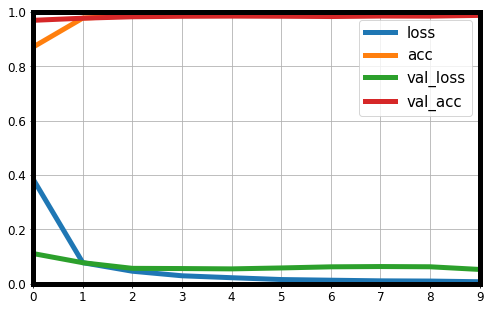

In [51]:
model4 = keras.models.Sequential()
model4.add(keras.layers.Flatten(input_shape=(32,32)))
model4.add(keras.layers.Dense(512, activation='relu'))
model4.add(keras.layers.Dense(128, activation='relu'))
model4.add(keras.layers.Dense(32, activation='relu'))
model4.add(keras.layers.Dense(10, activation='relu'))   # Neck
model4.add(keras.layers.Dense(32, activation='relu'))
model4.add(keras.layers.Dense(25, activation='relu'))
model4.add(keras.layers.Dense(10, activation='softmax'))
model4.summary()


model4.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


history4 = model4.fit(X_train, y_train, epochs=10, batch_size=320,
         validation_split=0.1,class_weight=weight)

pd.DataFrame(history4.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

#Accuracy of 10 Neurons is :  0.9873

In [52]:
model4.evaluate(X_test,y_test)

25588/25588 [==============================] - 2s 95us/sample - loss: 0.0614 - acc: 0.9873


[0.06137550164081631, 0.9872596]